**Importing Libraries**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

**Data Loading**

In [ ]:
df=pd.read_csv(r'C:\Users\sridattu\Downloads\train_dataset_final1.csv')

**Renaming of Column pay_0 to pay_1**

In [101]:
df = df.rename(columns={'pay_0': 'pay_1'})

In [102]:
df.head(10)

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
5,5022,1,1,1,80000,35.0,-1,2,-1,-1,...,3294.93,0.03,3722.62,890.98,661.97,3294.84,1087.51,1946.50,0.83,0
6,5023,1,0,2,200000,37.0,-1,-1,0,-1,...,10712.01,19312.98,9455.13,15306.21,7055.30,10700.16,12388.83,15185.33,0.81,0
7,5024,3,1,2,50000,24.0,0,0,0,0,...,5651.27,1600.15,6207.28,1464.87,2199.89,1000.26,3000.16,21055.33,0.12,0
8,5025,1,1,3,50000,44.0,0,0,0,0,...,9001.04,1761.95,2311.19,2200.21,176.18,180.19,9769.14,35039.67,0.08,0
9,5026,2,1,1,440000,NaN,0,-1,-1,-2,...,11350.05,8998.93,0.00,0.00,10960.93,502.87,448.09,9569.17,0.36,0


In [103]:
df.shape

(25247, 27)

In [104]:
df.dtypes

Customer_ID             int64
marriage                int64
sex                     int64
education               int64
LIMIT_BAL               int64
age                   float64
pay_1                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
Bill_amt1             float64
Bill_amt2             float64
Bill_amt3             float64
Bill_amt4             float64
Bill_amt5             float64
Bill_amt6             float64
pay_amt1              float64
pay_amt2              float64
pay_amt3              float64
pay_amt4              float64
pay_amt5              float64
pay_amt6              float64
AVG_Bill_amt          float64
PAY_TO_BILL_ratio     float64
next_month_default      int64
dtype: object

In [105]:
print(df.describe())
df.columns

        Customer_ID      marriage           sex     education       LIMIT_BAL  \
count  25247.000000  25247.000000  25247.000000  25247.000000    25247.000000   
mean   17640.000000      1.551907      0.604111      1.852101   168342.060443   
std     7288.325459      0.522629      0.489050      0.797379   129892.784807   
min     5017.000000      0.000000      0.000000      0.000000    10000.000000   
25%    11328.500000      1.000000      0.000000      1.000000    50000.000000   
50%    17640.000000      2.000000      1.000000      2.000000   140000.000000   
75%    23951.500000      2.000000      1.000000      2.000000   240000.000000   
max    30263.000000      3.000000      1.000000      6.000000  1000000.000000   

                age         pay_1         pay_2         pay_3         pay_4  \
count  25121.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      35.438199     -0.042857     -0.159544     -0.190359     -0.241415   
std        9.174998      1.099315

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

**bold text**

**Checking for class Imbalance**

In [106]:
default_counts = df['next_month_default'].value_counts()
print(default_counts)

next_month_default
0    20440
1     4807
Name: count, dtype: int64


In [107]:
# Check how many missing values are in each column
print(df.isnull().sum())

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_1                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


Data Pre-processing for EDA

**Removing Null Values**

In [65]:
df= df.dropna()
df.shape

(25121, 27)

In [108]:
# since in the assesment the Customer ID column does not act as any useful feature we can drop it
df_credit = df.drop(["Customer_ID"],axis=1)

In [109]:
df_credit.head()

,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [110]:
#Removing Unwanted categorical levels as given in the problem statement
#For education 1-graduation school 2-university school 3-high school 4-others
#for marriage 1-married 2-single 3-others
print(df_credit['education'].value_counts())
print(df_credit['marriage'].value_counts())

education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64
marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64


In [111]:
# necessary mapping is done to convert other categories to suitable ones
df_credit["education"]=df_credit["education"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df_credit["marriage"]=df_credit["marriage"].map({0:3,1:1,2:2,3:3})

In [112]:
print(df_credit['education'].value_counts())
print(df_credit['marriage'].value_counts())# hence the values are successfully changed

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64
marriage
2    13441
1    11480
3      326
Name: count, dtype: int64


**Using standard sklearn libraries, Only doing EDA on Training data after split of 80:20**

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [114]:
X=df_credit.drop(['next_month_default'],axis=1)
print(X.columns)

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')


In [115]:
# List of numerical columns to scale
numerical_cols = [
    'LIMIT_BAL', 'age',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'AVG_Bill_amt',
    'PAY_TO_BILL_ratio'
]

# Creating a preprocessor that only scales numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
    # Leaving one-hot encoded columns unchanged
)

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X)

In [116]:
X_scaled[0]

array([-0.83410488, -1.13770129,  0.12495635,  0.1645961 ,  0.13797812,
       -0.22762808, -0.29852452, -0.30508781, -0.2212485 , -0.25187706,
       -0.23270059, -0.19051373, -0.21479497, -0.20991996, -0.05329919,
       -0.06597086,  2.        ,  0.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  0.        ,  0.        ,  0.        ])

In [117]:
y=df_credit['next_month_default']

In [118]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Exploratory Data Analysis- Firstly Correlation Plot**

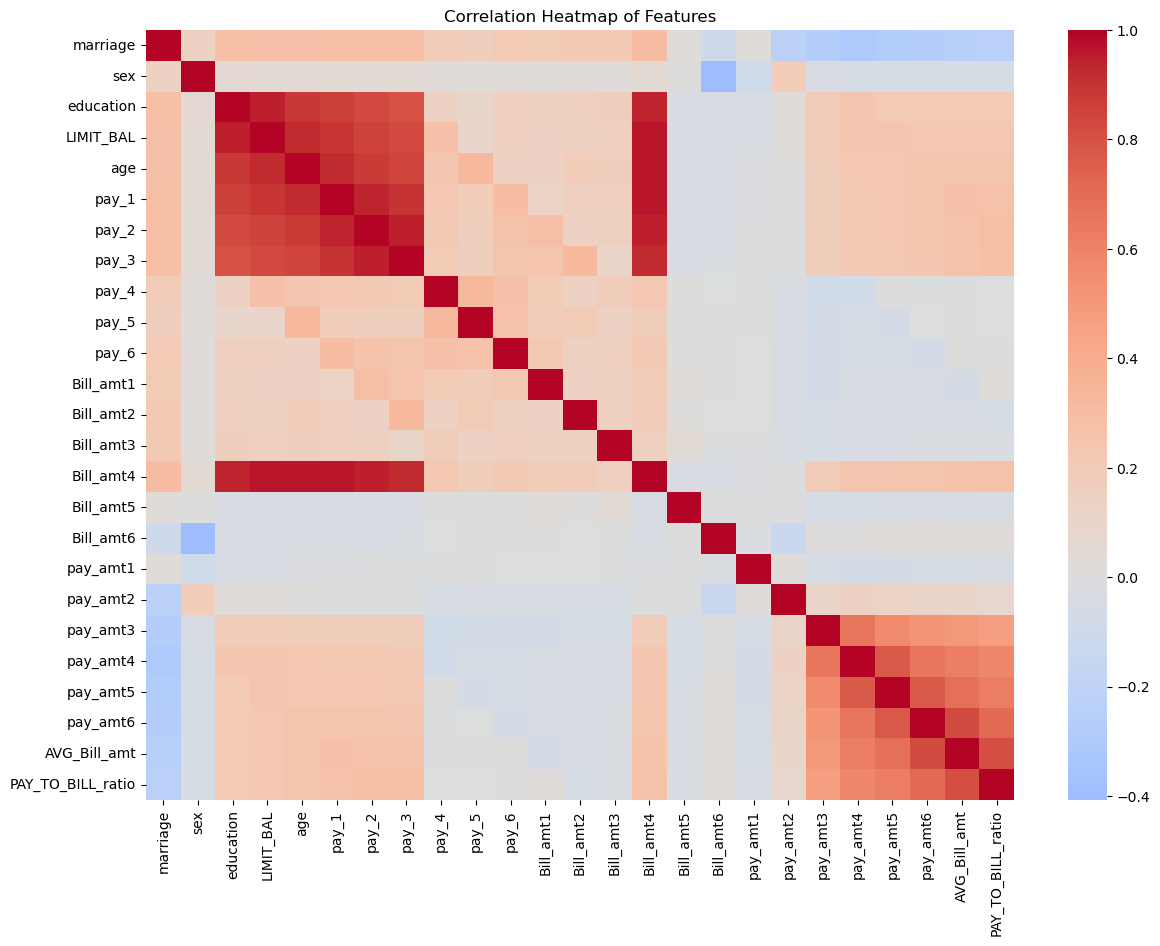

In [119]:
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import seaborn as sns
import pandas as pd

# Use original column names33
feature_cols = [
    'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
    'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio'
]


# Define only numerical columns
numerical_cols = [
    'LIMIT_BAL', 'age',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio'
]
y_series = pd.Series(y_train.flatten() if isinstance(y_train, np.ndarray) else y_train)

# Convert to DataFrame with correct columns
X_train_df = pd.DataFrame(X_train, columns=feature_cols)
# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(X_train_df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features")
plt.show()



**Doing Hypothesis Testing for Statistical Significance , Also tried with PCA, With PCA (no such Significant Outcome)**

***Feature Engineering- As mentioned in Problem statement exploring other two features which may act as important for decision making***

In [78]:

# Define bill and payment amount columns
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]


# PAY_TO_BILL_ratio = Total payment / Total bill
X_train_df['PAY_TO_BILL_ratio'] = X_train_df[pay_cols].sum(axis=1) / (X_train_df[bill_cols].sum(axis=1) + 1e-9)

# Define payment status columns (named in lowercase in your df: pay_1, pay_2, ...)
pay_status_cols = [f'pay_{i}' for i in range(1, 7)]

# Max delay across 6 months
X_train_df['MAX_PAYMENT_DELAY'] = X_train_df[pay_status_cols].max(axis=1)

# Average delay (replacing -2 with 0, which means treated as no delay)
X_train_df['AVG_PAYMENT_DELAY'] = X_train_df[pay_status_cols].replace(-2, 0).mean(axis=1)
X_train_df['CONSISTENT_REPAYER'] = X_train_df[pay_status_cols].apply(lambda row: (row <= 0).sum(), axis=1)
X_train_df['UTILIZATION_RATIO'] = X_train_df['AVG_Bill_amt'] / (X_train_df['LIMIT_BAL'] + 1e-9)

# Define only numerical columns
numerical_cols = [
    'LIMIT_BAL', 'age',
    'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'AVG_Bill_amt', 'PAY_TO_BILL_ratio','AVG_PAYMENT_DELAY',
    'UTILIZATION_RATIO'
]



# Perform point-biserial correlation test
print("=== Hypothesis Testing for Numerical Features (Point-Biserial) ===")
insignificant_cols = []

for col in numerical_cols:
    r, p = pointbiserialr(X_train_df[col], y_series)
    print(f"{col}: r = {r:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        insignificant_cols.append(col)

print("\n🚫 Insignificant Features (p > 0.05):")
print(insignificant_cols)

=== Hypothesis Testing for Numerical Features (Point-Biserial) ===
LIMIT_BAL: r = -0.0171, p-value = 0.0156
age: r = -0.0175, p-value = 0.0129
Bill_amt1: r = -0.0521, p-value = 0.0000
Bill_amt2: r = -0.0498, p-value = 0.0000
Bill_amt3: r = -0.0498, p-value = 0.0000
Bill_amt4: r = -0.0154, p-value = 0.0288
Bill_amt5: r = -0.0046, p-value = 0.5131
Bill_amt6: r = -0.0349, p-value = 0.0000
pay_amt1: r = -0.0372, p-value = 0.0000
pay_amt2: r = 0.0335, p-value = 0.0000
pay_amt3: r = 0.3110, p-value = 0.0000
pay_amt4: r = 0.2533, p-value = 0.0000
pay_amt5: r = 0.2287, p-value = 0.0000
pay_amt6: r = 0.2083, p-value = 0.0000
AVG_Bill_amt: r = 0.1975, p-value = 0.0000
PAY_TO_BILL_ratio: r = -0.0244, p-value = 0.0005
AVG_PAYMENT_DELAY: r = -0.0486, p-value = 0.0000
UTILIZATION_RATIO: r = -0.0007, p-value = 0.9204

🚫 Insignificant Features (p > 0.05):
['Bill_amt5', 'UTILIZATION_RATIO']


**Some Plots**

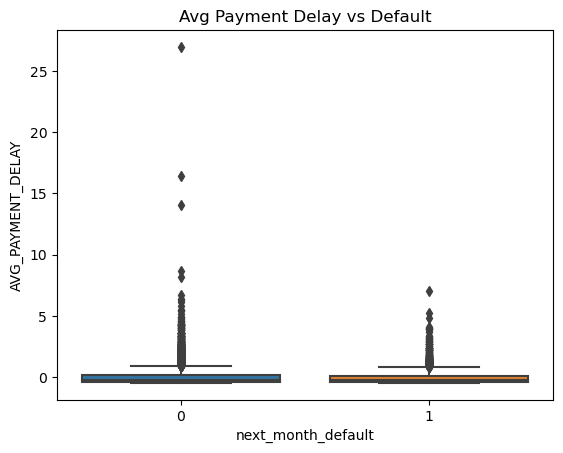

In [79]:
sns.boxplot(x=y_train, y='AVG_PAYMENT_DELAY', data=X_train_df)
plt.title("Avg Payment Delay vs Default")
plt.show()


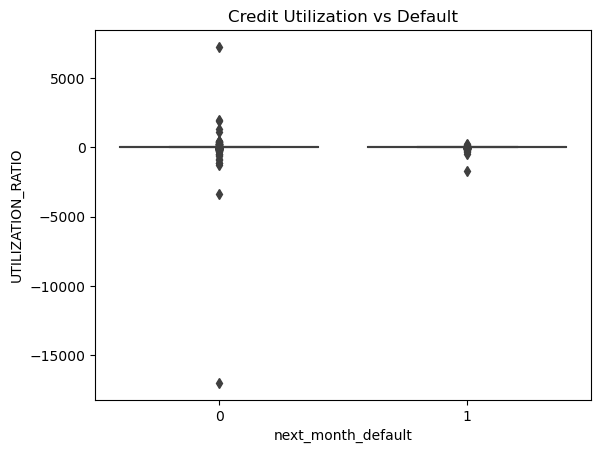

In [80]:
sns.boxplot(x=y_train, y='UTILIZATION_RATIO', data=X_train_df)
plt.title("Credit Utilization vs Default")
plt.show()


**Have to drop two columns mentioned in hypothesis testing**

In [81]:
print(X_train_df.columns)
## drop 'Bill_amt5' and  'UTILIZATION_RATIO'

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'MAX_PAYMENT_DELAY',
       'AVG_PAYMENT_DELAY', 'CONSISTENT_REPAYER', 'UTILIZATION_RATIO'],
      dtype='object')


**Checking Class imbalance after removing any null values in training data**

In [82]:
y_train.value_counts() # hence there is a class imbalance which may lead to poor results when the customer is defaulted
# Hence i am applying SMOTH(synthetic minority Oversampling technique)

next_month_default
0    16289
1     3807
Name: count, dtype: int64

**Data Pre-processing Pipeline , So that it can be easily fitted and used for validation dataset assuming similar type of distributions on both unseen, validation and training data for a ML Problem**

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Step 1: Define column groups
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
pay_cols = [f'pay_amt{i}' for i in range(1, 7) if i != 5]
#dropping pay_amt[5]
pay_status_cols = [f'pay_{i}' for i in range(1, 7)]

# Original numerical columns (before feature engineering)
base_numerical_cols = [
    'LIMIT_BAL', 'age'
] + bill_cols + pay_cols + ['AVG_Bill_amt']

# Engineered columns to scale
engineered_cols = [
    'PAY_TO_BILL_ratio',
    'MAX_PAYMENT_DELAY',
    'AVG_PAYMENT_DELAY',
    'CONSISTENT_REPAYER',
    ## dropping this 'UTILIZATION_RATIO'
]

# Combined columns for scaling
numerical_cols_to_scale = base_numerical_cols + engineered_cols

# Step 2: Feature Engineering Function
def add_custom_features(X):
    X = X.copy()

    # PAY_TO_BILL_ratio
    X['PAY_TO_BILL_ratio'] = X[pay_cols].sum(axis=1) / (X[bill_cols].sum(axis=1) + 1e-9)

    # MAX_PAYMENT_DELAY
    X['MAX_PAYMENT_DELAY'] = X[pay_status_cols].max(axis=1)

    # AVG_PAYMENT_DELAY
    X['AVG_PAYMENT_DELAY'] = X[pay_status_cols].replace(-2, 0).mean(axis=1)

    # CONSISTENT_REPAYER
    X['CONSISTENT_REPAYER'] = X[pay_status_cols].apply(lambda row: (row <= 0).sum(), axis=1)

    # UTILIZATION_RATIO
    X['UTILIZATION_RATIO'] = X['AVG_Bill_amt'] / (X['LIMIT_BAL'] + 1e-9)

    return X

# Step 3: Defining transformers
feature_engineering = FunctionTransformer(add_custom_features)

scaler = ColumnTransformer(
    transformers=[
        ('scale_num', StandardScaler(), numerical_cols_to_scale)
    ],
    remainder='passthrough'
    # Keeping other features like categorical or binary
)

# Step 4: Full pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering),
    ('scaling', scaler)
])


**Pre-processed Data**

In [84]:
#dropped those two columns in pipeline
X_train_processed = preprocessing_pipeline.fit_transform(X_train_df)


In [85]:
X_train_processed.shape

(20096, 29)

#Class Imbalance (Applying Synthetic Minority Oversampling technique)

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_processed, y_train)

In [87]:
print(y_resampled_smote.value_counts())
X_resampled_smote.shape

next_month_default
1    16289
0    16289
Name: count, dtype: int64


(32578, 29)

#Model training via assigning best threshold , Tradeoff between Recall and (Accuracy and Precision). As F2-Score gives more priority to Recall which we want to maximize but balancing a minimum precision/Accuracy

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42)
}

# Train-test split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_resampled_smote, y_resampled_smote, test_size=0.2, stratify=y_resampled_smote, random_state=42
)

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, beta=2):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=beta),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    }

# Run and collect results
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    metrics = evaluate_model(model, X_train_split, y_train_split, X_test_split, y_test_split)
    results[name] = metrics

# Show results
results_df = pd.DataFrame(results).T.sort_values(by='F2 Score', ascending=False)
print("\n=== Model Comparison ===")
print(results_df)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...


c:\Users\karth\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training LightGBM...
[LightGBM] [Info] Number of positive: 13031, number of negative: 13031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7327
[LightGBM] [Info] Number of data points in the train set: 26062, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

=== Model Comparison ===
                     Accuracy  Precision    Recall  F1 Score  F2 Score  \
Random Forest        0.889656   0.901868  0.874463  0.887954  0.879810   
XGBoost              0.888582   0.917271  0.854205  0.884615  0.866115   
LightGBM             0.887508   0.922382  0.846225  0.882664  0.860433   
Decision Tree        0.819061   0.816631  0.822897  0.819752  0.821637   
Logistic Regression  0.686157   0.694828  0.663904  0.679014  0.669867   

                      ROC-AUC  
Random Forest        0.956432  
XGBoo

c:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13031, number of negative: 13031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7327
[LightGBM] [Info] Number of data points in the train set: 26062, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


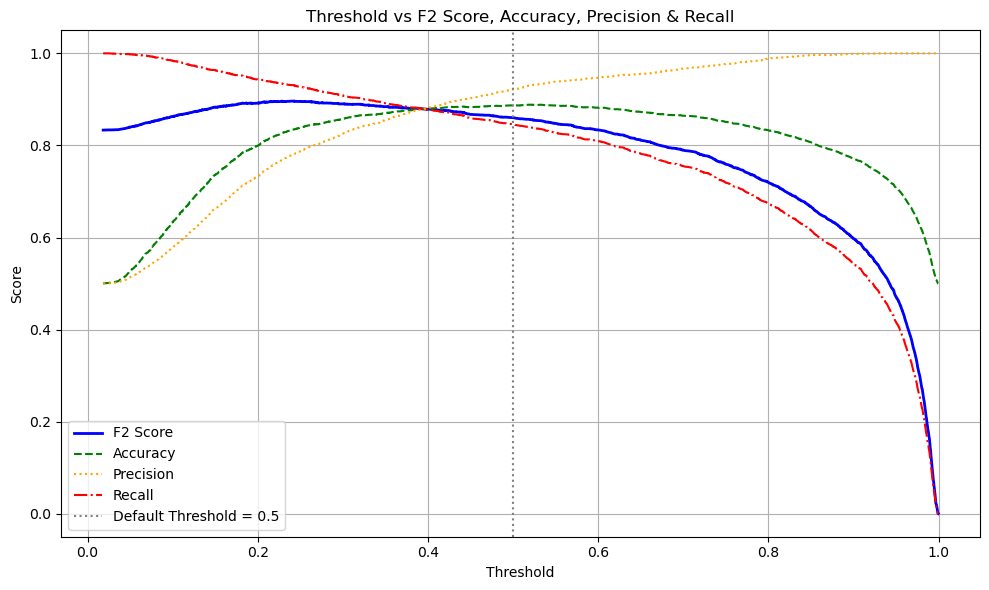

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    precision_recall_curve, fbeta_score, accuracy_score, precision_score, recall_score
)
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42, stratify=y_resampled_smote
)

# Step 2: Train LightGBM model
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 3: Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Step 4: Get precision-recall-threshold values
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Trim metrics to match threshold size
precisions = precisions[:-1]
recalls = recalls[:-1]

# F2 Score Calculation
beta = 2
f2_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-9)

# Accuracy Calculation
accuracies = [
    accuracy_score(y_test, (y_proba >= t).astype(int))
    for t in thresholds
]

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f2_scores, label="F2 Score", color='blue', linewidth=2)
plt.plot(thresholds, accuracies, label="Accuracy", color='green', linestyle='--')
plt.plot(thresholds, precisions, label="Precision", color='orange', linestyle=':')
plt.plot(thresholds, recalls, label="Recall", color='red', linestyle='-.')

plt.axvline(x=0.5, color='gray', linestyle=':', label='Default Threshold = 0.5')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs F2 Score, Accuracy, Precision & Recall")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, fbeta_score, precision_score,
    precision_recall_curve, roc_auc_score
)

def train_lightgbm_for_f2_and_accuracy(
    X, y, beta=2, precision_threshold=0.5, accuracy_threshold=0.855,
    test_size=0.2, random_state=42
):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, random_state=random_state
    )

    # Compute scale_pos_weight
    neg, pos = np.bincount(y_train)
    scale_pos_weight = neg / pos
    print(f"[INFO] scale_pos_weight = {scale_pos_weight:.2f}")

    # Train LightGBM
    model = lgb.LGBMClassifier(
        objective='binary',
        class_weight='balanced',  # handles imbalance internally
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=random_state
    )
    model.fit(X_train, y_train)

    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]

    # Precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

    # Compute F-beta scores and accuracies
    f2_scores = (1 + beta*2) * (precisions * recalls) / (beta*2 * precisions + recalls + 1e-9)
    accuracies = [(y_proba >= t).astype(int).mean() == y_test.mean() for t in thresholds]

    # Find best threshold that satisfies both constraints
    best_f2 = 0
    best_threshold = 0.5  # fallback
    for i in range(len(thresholds)):
        y_pred_temp = (y_proba >= thresholds[i]).astype(int)
        acc = (y_pred_temp == y_test).mean()
        if precisions[i] >= precision_threshold and acc >= accuracy_threshold:
            if f2_scores[i] > best_f2:
                best_f2 = f2_scores[i]
                best_threshold = thresholds[i]

    print(f"[INFO] Best Threshold = {best_threshold:.4f}")
    print(f"[INFO] Best F2 Score = {best_f2:.4f}")

    # Apply threshold
    y_pred = (y_proba >= best_threshold).astype(int)

    # Final report
    print("\n=== Final Classification Report ===")
    print(classification_report(y_test, y_pred))
    print(f"F2 Score: {fbeta_score(y_test, y_pred, beta=beta):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Accuracy: {(y_pred == y_test).mean():.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

    return model, best_threshold


**Also printing ROC-AUC value which also acts as a good metric**

**Changing Threshold and maintaining a minimum accuracy of 0.85(85%) to maximize recall, indirectly F2-score**

In [91]:
model,best_threshold=train_lightgbm_for_f2_and_accuracy(X_resampled_smote, y_resampled_smote)
print(train_lightgbm_for_f2_and_accuracy(X_resampled_smote, y_resampled_smote))

[INFO] scale_pos_weight = 1.00
[LightGBM] [Info] Number of positive: 13031, number of negative: 13031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7327
[LightGBM] [Info] Number of data points in the train set: 26062, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[INFO] Best Threshold = 0.3435
[INFO] Best F2 Score = 0.8833

=== Final Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3258
           1       0.83      0.90      0.86      3258

    accuracy                           0.86      6516
   macro avg       0.86      0.86      0.86      6516
weighted avg       0.86      0.86      0.86      6516

F2 Score: 0.8833
Precision: 0.8298
Accuracy: 0.8568
ROC-AUC: 0.9372
[INFO] scale_pos_weight = 1.00
[LightGBM] [Info] Number of positive: 13031, number of negative: 13031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7327
[LightGBM] [Info] Number of data points in the train set: 26062, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further split

c:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[INFO] Best Threshold = 0.3435
[INFO] Best F2 Score = 0.8833

=== Final Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3258
           1       0.83      0.90      0.86      3258

    accuracy                           0.86      6516
   macro avg       0.86      0.86      0.86      6516
weighted avg       0.86      0.86      0.86      6516

F2 Score: 0.8833
Precision: 0.8298
Accuracy: 0.8568
ROC-AUC: 0.9372
(LGBMClassifier(class_weight='balanced', max_depth=6, objective='binary',
               random_state=42), 0.34350210034884493)


**Now Prediction for Validation Dataset**

In [ ]:
df_val=df=pd.read_csv(r'C:\Users\sridattu\Downloads\validate_dataset_final.csv')
# Renaming Necessary for pre-processing Pipeline
df_val = df_val.rename(columns={'pay_0': 'pay_1'})
df_val.head(10)


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23
5,6,2,1,3,180000,52,0,0,0,0,...,134939.13,135815.03,5902.22,7692.94,5464.25,4892.92,5094.95,4862.26,156799.50,0.04
6,7,1,0,2,50000,36,0,0,0,0,...,48913.93,50441.36,1814.98,2305.94,1999.92,2000.05,2499.93,1700.21,48932.83,0.04
7,8,2,1,2,120000,23,0,0,0,0,...,4305.45,5128.68,2300.02,1199.89,999.83,1000.07,888.05,59999.64,21541.50,0.51
8,9,1,1,2,160000,42,0,0,0,0,...,35697.19,37122.86,2999.71,4999.86,2999.68,2000.06,1999.69,1999.98,31974.50,0.09
9,10,2,0,1,70000,31,0,0,0,0,...,64694.26,67905.69,6000.06,4999.94,10000.12,3000.37,5000.00,3000.12,58702.33,0.09


In [93]:
print(df.shape)
df= df.dropna()
df.shape

(5016, 26)


(5016, 26)

**No Null values in Validation Dataset**

In [94]:
# necessary mapping is done to convert other categories to suitable ones
df_val["education"]=df_val["education"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df_val["marriage"]=df_val["marriage"].map({0:3,1:1,2:2,3:3})
df_val.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,...,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,2508.500000,1.559410,0.606659,1.827751,168977.272727,35.379785,-0.031300,-0.161683,-0.188198,-0.235048,...,41244.782709,39805.868369,5356.196780,6.321958e+03,5420.142849,5150.979306,4926.404159,5148.384402,46054.169703,0.417159
std,1448.138806,0.516969,0.488540,0.740668,129478.787500,9.206542,1.116011,1.178731,1.172155,1.129667,...,62255.394325,60698.632561,13660.489329,2.920905e+04,17011.204561,17376.949234,17085.022267,16879.411346,65214.851897,13.729586
min,1.000000,1.000000,0.000000,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-10897.000000,-546.930000
25%,1254.750000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1755.395000,1205.210000,1000.047500,9.899050e+02,403.265000,278.172500,299.310000,156.382500,4905.665000,0.040000
50%,2508.500000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17953.255000,17054.315000,2093.655000,2.000410e+03,1845.425000,1500.120000,1500.155000,1453.210000,20933.415000,0.090000
75%,3762.250000,2.000000,1.000000,2.000000,240000.000000,41.250000,0.000000,0.000000,0.000000,0.000000,...,50175.052500,49070.565000,5029.505000,5.000323e+03,4883.887500,4282.550000,4097.725000,4000.095000,56573.540000,0.570000
max,5016.000000,3.000000,1.000000,4.000000,800000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,547880.830000,513798.830000,323014.110000,1.684259e+06,371717.910000,432129.910000,426529.180000,260000.100000,548854.330000,797.000000


In [95]:
# Drop Customer_ID before passing
X_val_input = df_val.drop('Customer_ID', axis=1)
print(X_val_input.columns)

# Transform data-using the fitted pipeline for Training Data
X_val_processed = preprocessing_pipeline.transform(X_val_input)
print(X_val_processed.shape)

# Making predictions
y_val_pred = (model.predict_proba(X_val_processed)[:, 1] >= best_threshold).astype(int)

# Output to CSV
df_output = pd.DataFrame({
    'Customer_ID': df_val['Customer_ID'],
    'Predicted_Default': y_val_pred
})
df_output.to_csv("validation_predictions.csv", index=False)


Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')
(5016, 29)


c:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Summary of Validation Predictions

In [97]:
import pandas as pd

df_pred = pd.read_csv("validation_predictions.csv")
print(df_pred.head())
print(df_pred['Predicted_Default'].value_counts())


   Customer_ID  Predicted_Default
0            1                  0
1            2                  0
2            3                  0
3            4                  1
4            5                  0
Predicted_Default
0    3839
1    1177
Name: count, dtype: int64
